* This notebook was made to look at the statistics of wind information by plotting wind rose diagram

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pylab
import matplotlib.cm as cm
import numpy as np
from math import pi
import wind
import datetime, os
import netCDF4 as nc
from windrose import WindroseAxes
from salishsea_tools import (
    nc_tools,
    viz_tools,
    stormtools,
    tidetools,
)
import pandas as pd

In [2]:
OP = nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d01.nc')
OPlon =OP.variables['nav_lon'][:]-360
OPlat = OP.variables['nav_lat'][:]

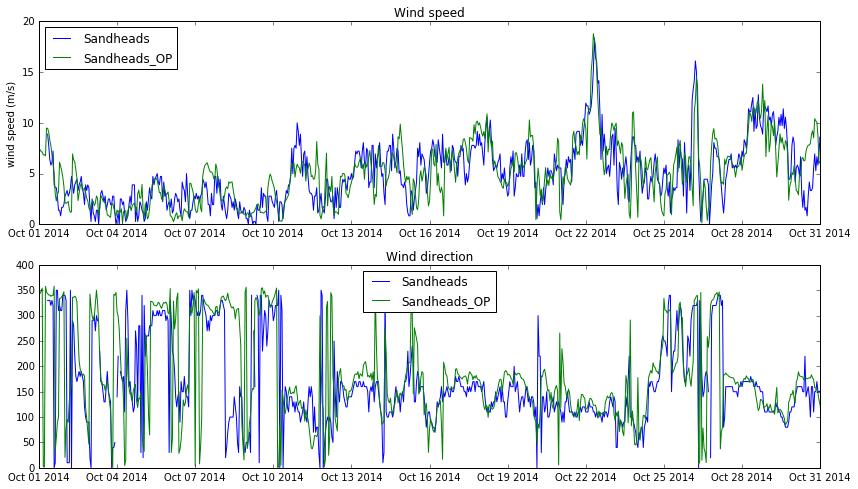

In [3]:
import glob
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-Oct-2014'; end = '31-Oct-2014';
start2 = '31-Oct-2014'; end2 = '31-Oct-2014';
endd = '31-Oct-2014';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

ax =wind.compare_winds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

In [4]:
import glob
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-Oct-2014'; end = '31-Oct-2014';
start2 = '31-Oct-2014'; end2 = '31-Oct-2014';
endd = '31-Oct-2014';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

wind_speed,wind_dir =wind.get_OPwinds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

In [5]:
## convert direction 
wind_dir_correct = []
for dire in wind_dir['Sandheads_OP']:
    dire_corre = 450 - dire
    wind_dir_correct.append(dire_corre)

In [6]:
df = pd.DataFrame({"speed": wind_speed['Sandheads_OP'], "direction": wind_dir_correct})

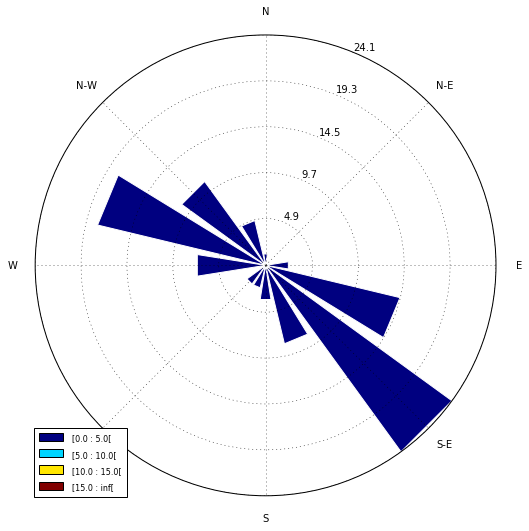

In [7]:
## weak wind
ax = WindroseAxes.from_ax()
ax.bar(df.direction[48:144], df.speed[48:144], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

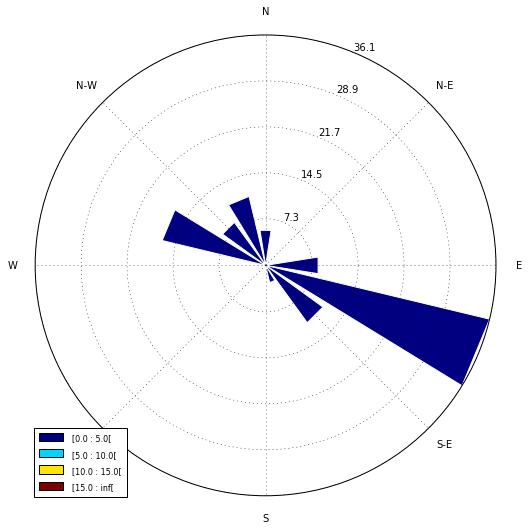

In [27]:
## weak wind: Oct 7~ Oct 9, 15 am.
ax = WindroseAxes.from_ax()
ax.bar(df.direction[192:233], df.speed[192:233], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

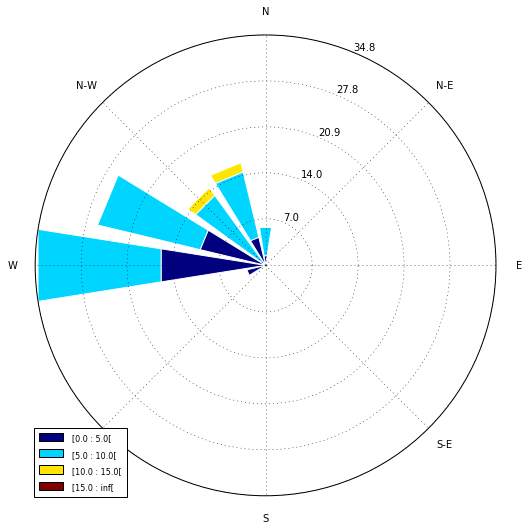

In [8]:
## moderate wind
ax = WindroseAxes.from_ax()
ax.bar(df.direction[408:480], df.speed[408:480], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

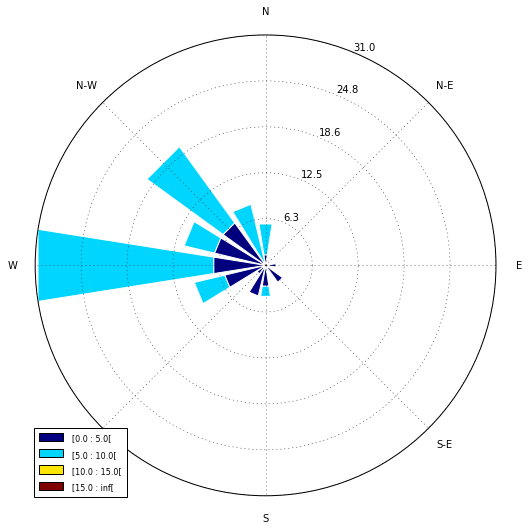

In [34]:
## moderate wind: oct 13~15
ax = WindroseAxes.from_ax()
ax.bar(df.direction[288:359], df.speed[288:359], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

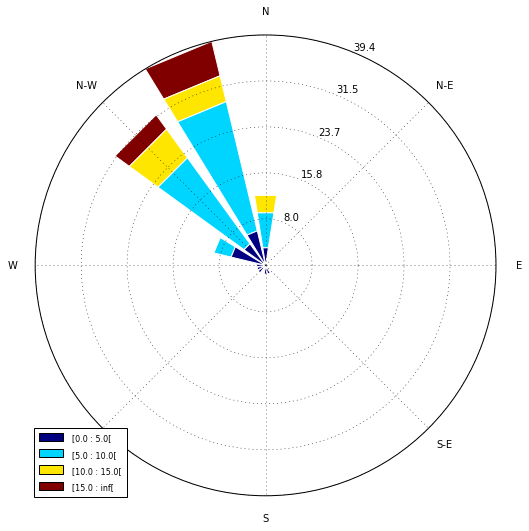

In [38]:
## strong wind
ax = WindroseAxes.from_ax()
ax.bar(df.direction[480:551], df.speed[480:551], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

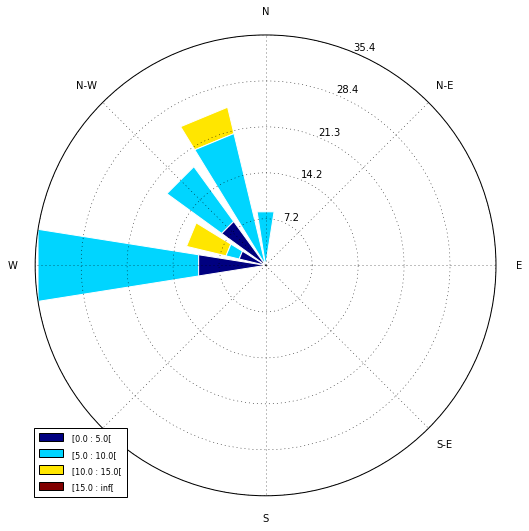

In [40]:
## strong wind: oct 28~30
ax = WindroseAxes.from_ax()
ax.bar(df.direction[671:719], df.speed[671:719], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

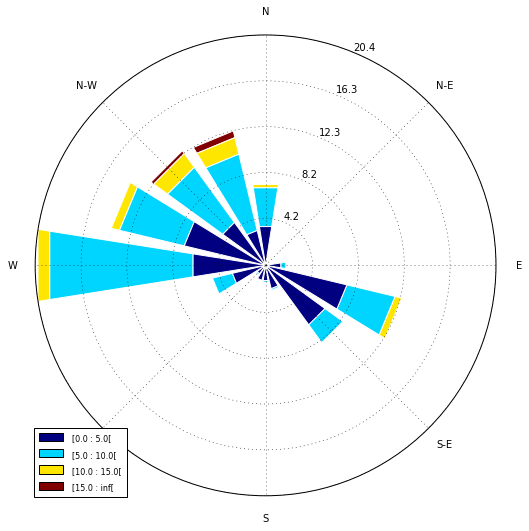

In [10]:
## total wind during the month
ax = WindroseAxes.from_ax()
ax.bar(df.direction, df.speed, bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

In [11]:
#pylab.savefig('windrose')